In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import time
from PIL import Image
from tensorflow.keras.models import load_model
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

model = load_model('/content/drive/MyDrive/Licenta/model_75000_batch250_ep800_acc44.h5')

data = np.load('/content/drive/MyDrive/Licenta/dataset_masked_faces_augumented_final_6.npz')
X_train, y_train, X_test, y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

X_train=X_train.astype(np.float16)/255
X_test=X_test.astype(np.float16)/255

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
trainy_encoded=le.fit_transform(y_train)
testy_encoded=le.transform(y_test)

Mounted at /content/drive


In [2]:
history = model.fit(X_train,trainy_encoded, batch_size=250, epochs=800,validation_data=(X_test,testy_encoded),verbose=2)

Epoch 1/800
209/209 - 45s - loss: 4.9694 - accuracy: 0.0702 - val_loss: 3.7398 - val_accuracy: 0.3499 - 45s/epoch - 215ms/step
Epoch 2/800
209/209 - 12s - loss: 4.5288 - accuracy: 0.1009 - val_loss: 3.5814 - val_accuracy: 0.3656 - 12s/epoch - 59ms/step
Epoch 3/800
209/209 - 13s - loss: 4.3659 - accuracy: 0.1154 - val_loss: 3.5048 - val_accuracy: 0.3732 - 13s/epoch - 60ms/step
Epoch 4/800
209/209 - 12s - loss: 4.2495 - accuracy: 0.1297 - val_loss: 3.4862 - val_accuracy: 0.3756 - 12s/epoch - 59ms/step
Epoch 5/800
209/209 - 12s - loss: 4.1632 - accuracy: 0.1428 - val_loss: 3.3892 - val_accuracy: 0.3810 - 12s/epoch - 59ms/step
Epoch 6/800
209/209 - 12s - loss: 4.0864 - accuracy: 0.1515 - val_loss: 3.4043 - val_accuracy: 0.3733 - 12s/epoch - 59ms/step
Epoch 7/800
209/209 - 12s - loss: 4.0111 - accuracy: 0.1621 - val_loss: 3.2983 - val_accuracy: 0.3796 - 12s/epoch - 59ms/step
Epoch 8/800
209/209 - 12s - loss: 3.9451 - accuracy: 0.1698 - val_loss: 3.3487 - val_accuracy: 0.3701 - 12s/epoch - 5

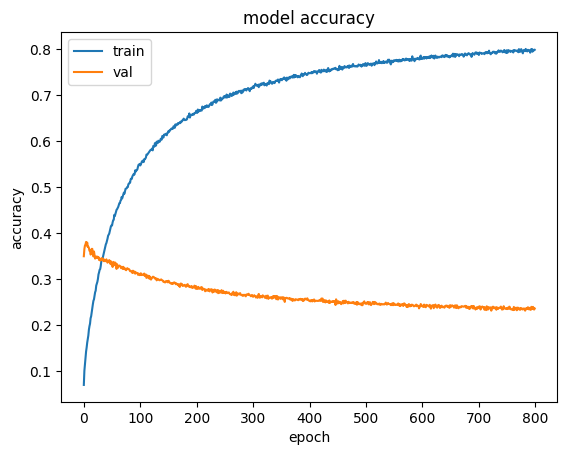

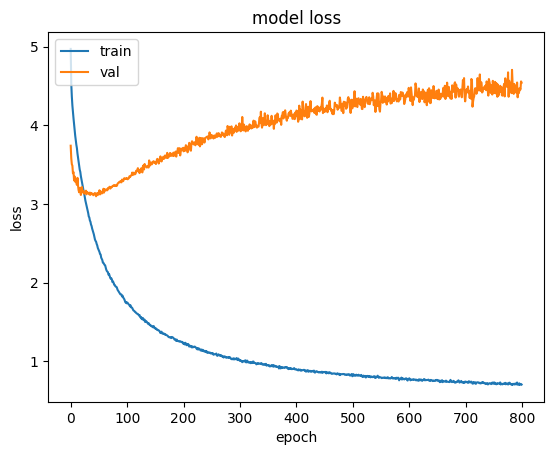

In [3]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [4]:
model.save('/content/drive/MyDrive/Licenta/model_75000_batch250_ep800_fine-tunning_acc23.h5')